In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes_preprocessado.csv', names=['#Gravidezes', 'Glicose', 'PD', 'DobraTriceps', 'Insulina', 'IMC', 'DiabetesPedigreeFunction', 'Idade', 'Classe'])

In [20]:
df.head()

,#Gravidezes,Glicose,PD,DobraTriceps,Insulina,IMC,DiabetesPedigreeFunction,Idade,Classe
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
df.isnull().values.any()

False

In [22]:
pd.set_option('display.max_columns', 10)

In [23]:
df.describe()

,#Gravidezes,Glicose,PD,DobraTriceps,Insulina,IMC,DiabetesPedigreeFunction,Idade,Classe
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
# Tratando os valoes inconsistentes

print('Estatisticas Descritivas:')
print(df.describe())
print('\nContando os zeros na amostra:\n')
print(f'Número de gravidezes: {(df["#Gravidezes"]==0).sum()}')
print(f'Glicose: {(df["Glicose"]==0).sum()}')
print(f'Pressão diastólica: {(df["PD"]==0).sum()}')
print(f'Espessura da dobra do tríceps: {(df["DobraTriceps"]==0).sum()}')
print(f'Insulina: {(df["Insulina"]==0).sum()}')
print(f'IMC: {(df["IMC"]==0).sum()}')
print(f'Idade: {(df["Idade"]==0).sum()}')

Estatisticas Descritivas:
       #Gravidezes     Glicose          PD  DobraTriceps    Insulina  \
count   768.000000  768.000000  768.000000    768.000000  768.000000   
mean      3.845052  120.894531   69.105469     20.536458   79.799479   
std       3.369578   31.972618   19.355807     15.952218  115.244002   
min       0.000000    0.000000    0.000000      0.000000    0.000000   
25%       1.000000   99.000000   62.000000      0.000000    0.000000   
50%       3.000000  117.000000   72.000000     23.000000   30.500000   
75%       6.000000  140.250000   80.000000     32.000000  127.250000   
max      17.000000  199.000000  122.000000     99.000000  846.000000   

              IMC  DiabetesPedigreeFunction       Idade      Classe  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000  

In [25]:
print(f'Linhas antes da exclusão: {len(df)}')
excluir_glicose_0 = df.index[df.Glicose == 0].tolist()
excluir_pd_0 = df.index[df['PD'] == 0].tolist()

excluir_triceps_0 = df.index[df.DobraTriceps == 0].tolist()
excluir_insulina_0 = df.index[df.Insulina == 0].tolist()
excluir_imc_0 = df.index[df.IMC == 0].tolist()
temp = excluir_glicose_0
temp += excluir_pd_0
temp += excluir_pd_0
temp += excluir_triceps_0
temp += excluir_insulina_0
temp += excluir_imc_0

df = df.drop(df.index[temp])
classe_0 = len(df[df['Classe'] == 0])
classe_1 = len(df[df['Classe'] == 1])
print(f'Linhas após a exclusao: {len(df)}')

print(f'Pessoas COM diabetes na amostra: {classe_0} ({(classe_0 * 100 / (classe_0 + classe_1)):.2f}%)')
print(f'Pessoas SEM diabetes na amostra: {classe_1} ({(classe_1 * 100 / (classe_0 + classe_1)):.2f}%)')


df.to_csv('diabetes_preprocessado.csv', header=False)

Linhas antes da exclusão: 768
Linhas após a exclusao: 392
Pessoas COM diabetes na amostra: 262 (66.84%)
Pessoas SEM diabetes na amostra: 130 (33.16%)


In [26]:
df = pd.read_csv(r"C:\Users\gusta\OneDrive\Estudo Ciencia de Dados\C13\diabetes_preprocessado.csv", names=['#Gravidezes', \
                                        'Glicose', 'PD', \
                                        'DobraTricepes', 'Insulina', 'IMC', \
                                        'DiabetesPedigreeFunction', 'Idade', \
                                        'Classe'])

<Axes: xlabel='classe'>

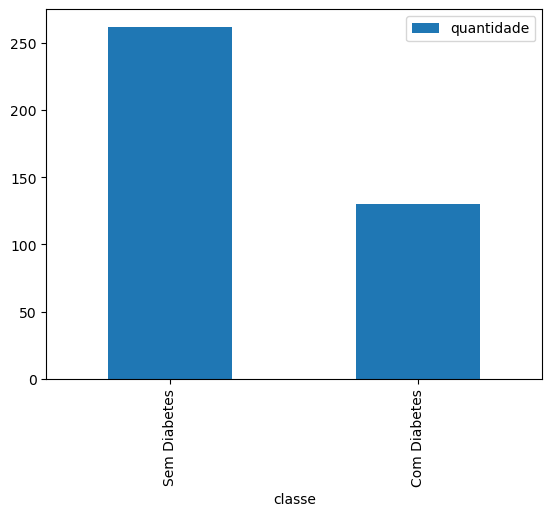

In [27]:
df_classe = pd.DataFrame({'classe':['Sem Diabetes', 'Com Diabetes'], 'quantidade':[len(df[df['Classe'] == 0]), len(df[df['Classe'] == 1])]})
df_classe.plot(kind='bar', x='classe', y='quantidade')

C:\Users\gusta\AppData\Local\Temp\ipykernel_8120\1390080570.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variavel],kde=False)
C:\Users\gusta\AppData\Local\Temp\ipykernel_8120\1390080570.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sem_diabetes[variavel],kde=False,color="Blue",

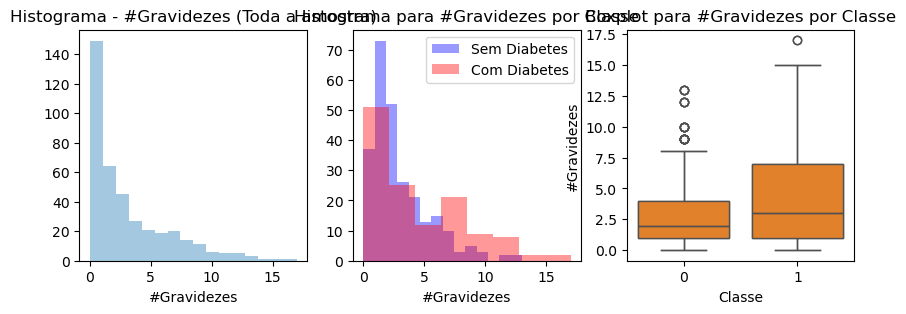

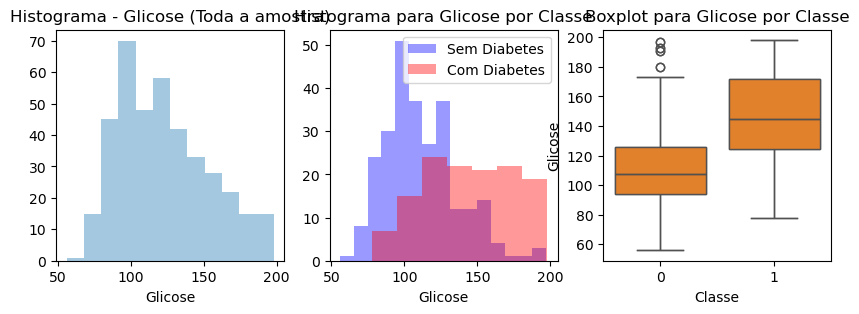

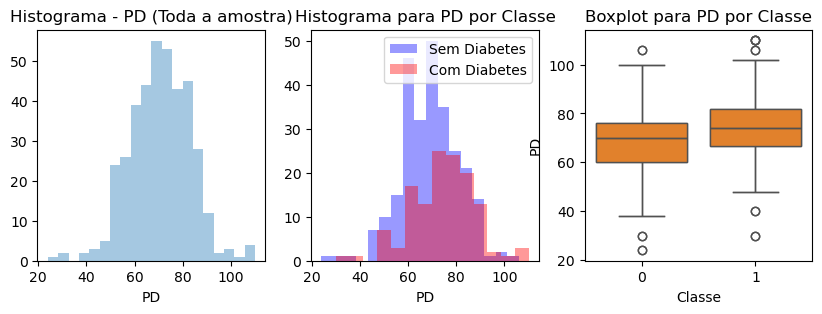

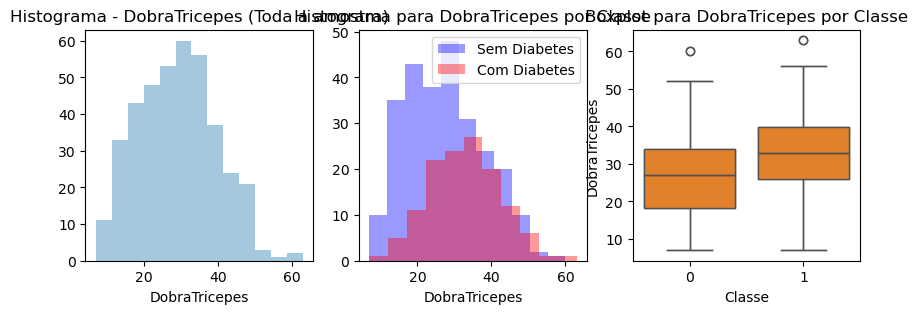

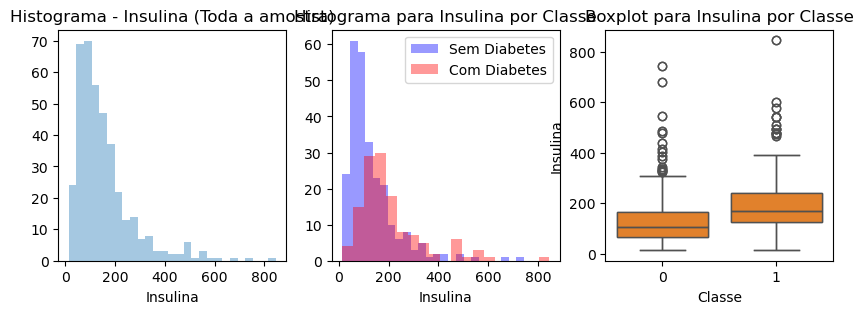

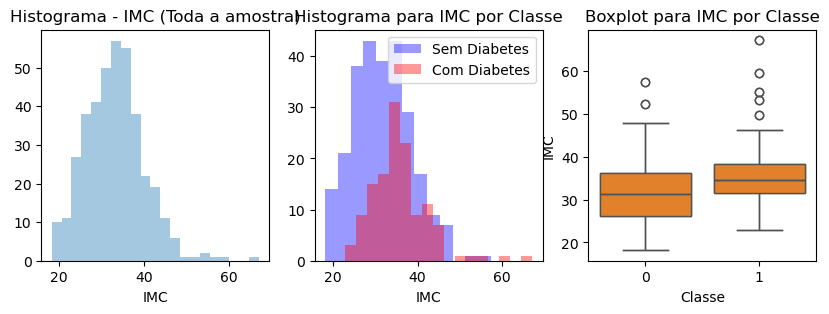

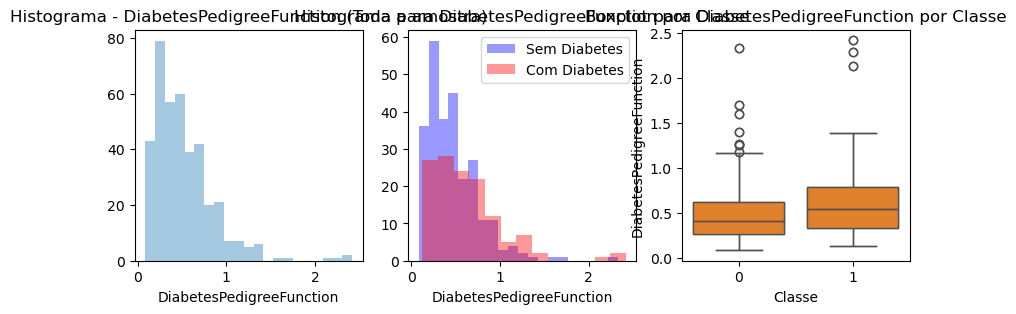

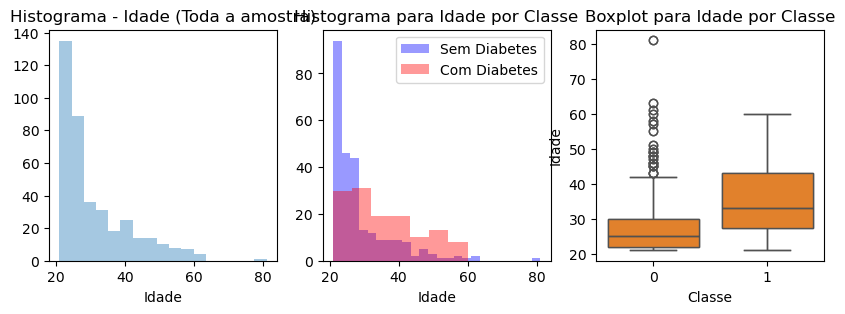

In [28]:
import seaborn as sns

df = pd.read_csv(r"C:\Users\gusta\OneDrive\Estudo Ciencia de Dados\C13\diabetes_preprocessado.csv", names=['#Gravidezes', \
                                        'Glicose', 'PD', \
                                        'DobraTricepes', 'Insulina', 'IMC', \
                                        'DiabetesPedigreeFunction', 'Idade', \
                                        'Classe'])

com_diabetes = df[df.Classe==1]
sem_diabetes = df[df.Classe==0]

for variavel in df.columns:
    if variavel != 'Classe':
        # Histograma da variável:
        plt.figure(figsize=(10, 3))
        plt.subplot(1,3,1)
        plt.title('Histograma - ' + variavel + ' (Toda a amostra)')
        sns.distplot(df[variavel],kde=False)
        plt.subplot(1,3,2)
        # Histograma por classe:
        sns.distplot(sem_diabetes[variavel],kde=False,color="Blue", 
                     label=variavel + " sem Diabetes")
        sns.distplot(com_diabetes[variavel],kde=False,color="Red", 
                     label=variavel + " com Diabetes")
        plt.title("Histograma para " + variavel + " por Classe")
        plt.legend(['Sem Diabetes', 'Com Diabetes'])
        # Boxplot por classe:
        plt.subplot(1,3,3)
        sns.boxplot(x=df.Classe,y=df[variavel])
        sns.boxplot(x=df.Classe,y=df[variavel])
        plt.title("Boxplot para " + variavel + " por Classe")

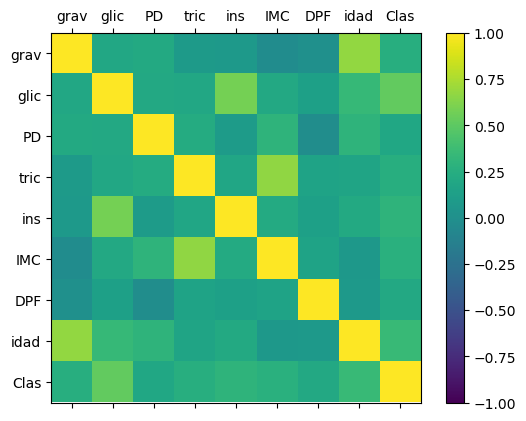

In [37]:
atributos = ['#Gravidezes', 'Glicose', 'PD', 'DobraTriceps', 'Insulina', 'IMC', 'DiabetesPedegreeFunction', 'Idade', 'Classe']

df = pd.read_csv(r'C:\Users\gusta\OneDrive\Estudo Ciencia de Dados\C13\diabetes_preprocessado.csv', names=atributos)
matriz = df.corr()

grafico = plt.figure()

subgrafico = grafico.add_subplot(111) # (111) = 1 linha, 1 coluna, 1 subplot ativo

cax = subgrafico.matshow(matriz, vmin=-1, vmax=1)
grafico.colorbar(cax)
ticks = np.arange(0, 9, 1)
subgrafico.set_xticks(ticks)
subgrafico.set_yticks(ticks)

titulos_abreviados=['grav', 'glic', 'PD', 'tric', 'ins', 'IMC', 'DPF', 'idad', 'Clas']

subgrafico.set_xticklabels(titulos_abreviados)
subgrafico.set_yticklabels(titulos_abreviados)
plt.show()



array([[<Axes: xlabel='#Gravidezes', ylabel='#Gravidezes'>,
        <Axes: xlabel='Glicose', ylabel='#Gravidezes'>,
        <Axes: xlabel='PD', ylabel='#Gravidezes'>,
        <Axes: xlabel='DobraTriceps', ylabel='#Gravidezes'>,
        <Axes: xlabel='Insulina', ylabel='#Gravidezes'>,
        <Axes: xlabel='IMC', ylabel='#Gravidezes'>,
        <Axes: xlabel='DiabetesPedegreeFunction', ylabel='#Gravidezes'>,
        <Axes: xlabel='Idade', ylabel='#Gravidezes'>,
        <Axes: xlabel='Classe', ylabel='#Gravidezes'>],
       [<Axes: xlabel='#Gravidezes', ylabel='Glicose'>,
        <Axes: xlabel='Glicose', ylabel='Glicose'>,
        <Axes: xlabel='PD', ylabel='Glicose'>,
        <Axes: xlabel='DobraTriceps', ylabel='Glicose'>,
        <Axes: xlabel='Insulina', ylabel='Glicose'>,
        <Axes: xlabel='IMC', ylabel='Glicose'>,
        <Axes: xlabel='DiabetesPedegreeFunction', ylabel='Glicose'>,
        <Axes: xlabel='Idade', ylabel='Glicose'>,
        <Axes: xlabel='Classe', ylabel='Glicose'

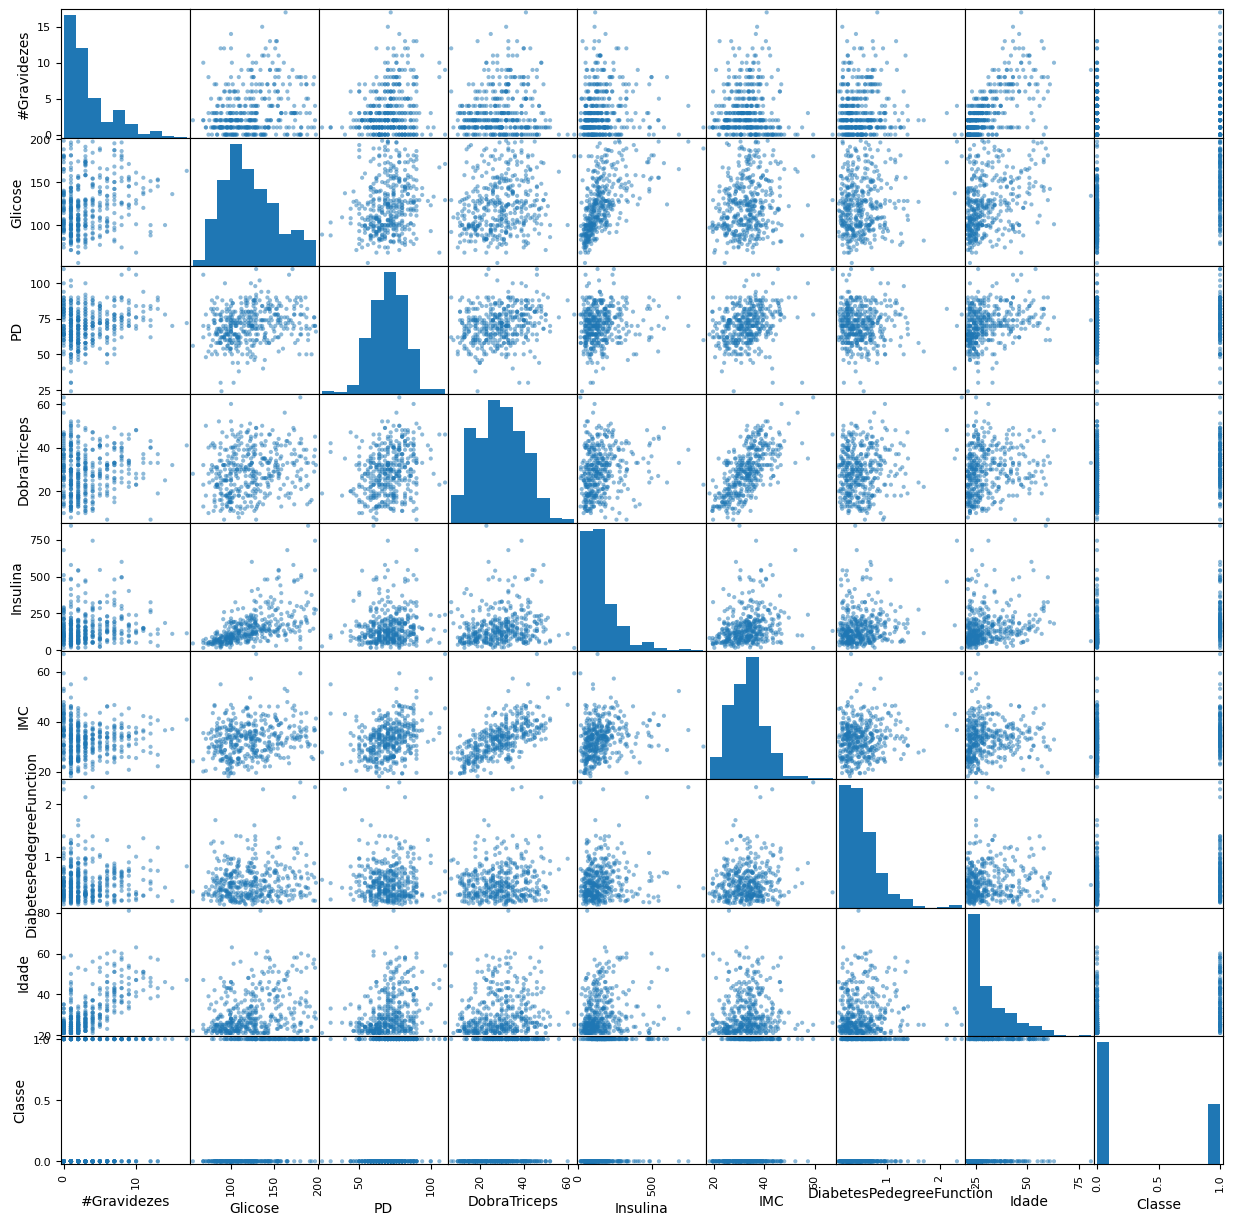

In [40]:
from pandas.plotting import scatter_matrix
df = pd.read_csv(r'C:\Users\gusta\OneDrive\Estudo Ciencia de Dados\C13\diabetes_preprocessado.csv', names=['#Gravidezes', 'Glicose', 'PD', 'DobraTriceps', 'Insulina', 'IMC', 'DiabetesPedegreeFunction', 'Idade', 'Classe'])

scatter_matrix(df, figsize=(15, 15))

In [41]:
coeficiente = df.corr()
coeficiente

,#Gravidezes,Glicose,PD,DobraTriceps,Insulina,IMC,DiabetesPedegreeFunction,Idade,Classe
#Gravidezes,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glicose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
PD,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
DobraTriceps,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulina,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
IMC,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedegreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Idade,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Classe,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000
